# 문제: 기대수명 예측하기

- WHO가 제공하는 국가별 건강, 교육, 경제 데이터를 기반으로 기대 수명을 예측
- 193개국, 15년간 관측한 데이터 (2000~2015)로 20개의 특성 (feature) 사용
- X-y **선형회귀모델** 사용
- 여러 특성간의 관계를 파악

# 참고: 머신러닝

## 머신러닝 정의
- 수치를 예측하는 회귀, 카테고리를 예측하는 분류, 최적의 추천 등을 수행하는 소프트웨어로, 데이터를 보고 학습하여 점차 성능이 개선된다
- 현재 인공지능을 구현하는 대표적인 방법이 머신러닝 기법이다
 - 인공지능을 구현하는 다른 방법으로 "생각하는" 컴퓨터를 만들거나, 언어를 문법적으로 이해하는 컴퓨터를 만드는 것, 또는 사람의 지식을 알고리즘이나 데이터로 구축하는 방법은 성공하지 못했다
 

- 머신러닝 동작
<img src="https://raw.githubusercontent.com/data-labs/image/main/%E1%84%89%E1%85%B3%E1%84%8F%E1%85%B3%E1%84%85%E1%85%B5%E1%86%AB%E1%84%89%E1%85%A3%E1%86%BA%202020-12-29%20%E1%84%8B%E1%85%A9%E1%84%92%E1%85%AE%2010.08.38.png?raw=1" align='left'>

### 데이터 (X)
- 훈련 (train) 데이터: 모델을 학습시키는데 사용하는 데이터
- 검증 (validation) 데이터: 학습시킨 모델의 동작을 검증하는데 사용하는 데이터
- 학습에 사용하는 데이터가 많을수록 예측, 추천 성능이 향상된다
 - 데이터 타입: 정형 데이터(테이블 데이터), 비정형 데이터(이미지, 텍스트, 센서 데이터 등)
- 머신러닝 모델의 성능을 높이기 위해서는 원시(raw) 데이터로부터 적절한 학습 및 검증 데이터를 만드는 **데이터 전처리**가 반드시 필요하다

### 머신러닝 모델
- 입력 데이터(X)로부터 최적의 출력(y)을 얻는 소프트웨어
- 최적의 출력이란 정답(label, target)을 잘 예측하는 것을 말한다
 - 최적의 출력을 얻기 위해서 모델을 구성하는 파라미터의 최적치를 찾는다(예: 선형 회귀에서 가중치 값)
- 모델의 종류: 선형모델, 로지스틱 회귀, SVM, 결정트리, 랜덤 포레스트, kNN, 베이시언, 딥러닝 모델 (MLP, CNN, RNN 등)

### 목적
- 머신러닝의 목적은 다음 중 하나이다
 - 예측(predictive) 분석
> 회귀 예측(regression): 수치를 예측  
> 분류 예측(classification): 카테고리를 예측
 - 설명(descriptive)적 분석
 - 군집화(clustering)
 - 추천(recommendation)
 
### 성능평가 (performance measure)
- 모델이 원하는 동작을 잘 수행하는지를 평가하는 값으로, 주요 평가 척도는 다음과 같다
 - 회귀모델에서는 R-squared를 사용
 - 분류 모델에서는 정확도(accuracy), 정밀도(precision), 리콜(recall), f-1 점수, ROC-AUC 등을 사용 
 
### 최적화기 (optimizer)
- 학습을 통하여 모델 파라미터를 최적의 값으로 수렴시키는 알고리즘
- 최적화 알고리즘으로는 경사하강법(GD: gradient descent)이 기본적으로 사용된다 

### 손실함수 (loss function)
- 최적화기는 손실함수를 최소화 하는 방향으로 동작한다
- 즉, 손실함수는 최적화기의 동작이 잘 이루어지고 있는지를 모니터링하는 값이다
- 손실함수로, 회귀 모델에서는 MSE(mean square error)를, 분류에서는 크로스 엔트로피(cross entrophy)를 주로 사용한다


# 데이터

- Life Expectancy (WHO)
- 193개국, 15년간 관측한 데이터 (2000~2015)
- 결측치가 많은 국가는 제외
- 데이터 (2938,22)
 - Immunization related factors, Mortality factors, Economical factors and Social factors
 - Adult Mortality Rates of both sexes (probability of dying between 15 and 60 years per 1000 population)

## import

In [26]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from warnings import filterwarnings
filterwarnings('ignore')
%config InlineBackend.figure_format="retina"
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8,6)
matplotlib.rcParams.update({'font.size': 14})

In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score    
import seaborn as sns

## 데이터 읽기

In [28]:
data = pd.read_csv("https://raw.githubusercontent.com/StillWork/data/master/Life%20Expectancy%20Data.csv")
print(data.shape)
data[:5]

(2938, 22)


,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


## 결측치 처리


In [29]:
data.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

- 결측치가 있는 샘플을 모두 삭제하겠다

In [30]:
data = data.dropna()
print(data.shape)
data[:3]

(1649, 22)


,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9


- 카테고리 변수

In [31]:
data.Status.value_counts()

Developing    1407
Developed      242
Name: Status, dtype: int64

In [32]:
data.Status = data.Status.map({"Developing":0, "Developed":1})
data[:3]

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,0,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,0,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,0,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9


## 데이터 백업

In [33]:
df = data.reset_index().copy()

## 데이터 탐색

### 상관계수

In [34]:
df.corr()[:5]

,index,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
index,1.000000,-0.024005,-0.081569,-0.115201,0.100986,-0.028919,-0.108250,-0.120648,0.012779,-0.037481,-0.021279,-0.023491,0.011375,-0.021566,-0.037585,0.156730,-0.117444,-0.018805,-0.021624,0.010603,-0.081672,-0.053490
Year,-0.024005,1.000000,-0.034138,0.050771,-0.037092,0.008029,-0.113365,0.069553,0.114897,-0.053822,0.005739,0.010479,-0.016699,0.059493,0.029641,-0.123405,0.096421,0.012567,0.019757,0.014122,0.122892,0.088732
Status,-0.081569,-0.034138,1.000000,0.442798,-0.278173,-0.108757,0.607782,0.461688,0.140351,-0.071963,0.298380,-0.109847,0.201917,0.192538,0.201654,-0.129555,0.484801,-0.034790,-0.308005,-0.307279,0.463615,0.512543
Life expectancy,-0.115201,0.050771,0.442798,1.000000,-0.702523,-0.169074,0.402718,0.409631,0.199935,-0.068881,0.542042,-0.192265,0.327294,0.174718,0.341331,-0.592236,0.441322,-0.022305,-0.457838,-0.457508,0.721083,0.727630
Adult Mortality,0.100986,-0.037092,-0.278173,-0.702523,1.000000,0.042450,-0.175535,-0.237610,-0.105225,-0.003967,-0.351542,0.060365,-0.199853,-0.085227,-0.191429,0.550691,-0.255035,-0.015012,0.272230,0.286723,-0.442203,-0.421171


In [35]:
df.corr()['Life expectancy '].sort_values(ascending=False)

Life expectancy                    1.000000
Schooling                          0.727630
Income composition of resources    0.721083
 BMI                               0.542042
Status                             0.442798
GDP                                0.441322
percentage expenditure             0.409631
Alcohol                            0.402718
Diphtheria                         0.341331
Polio                              0.327294
Hepatitis B                        0.199935
Total expenditure                  0.174718
Year                               0.050771
Population                        -0.022305
Measles                           -0.068881
index                             -0.115201
infant deaths                     -0.169074
under-five deaths                 -0.192265
 thinness 5-9 years               -0.457508
 thinness  1-19 years             -0.457838
 HIV/AIDS                         -0.592236
Adult Mortality                   -0.702523
Name: Life expectancy , dtype: f

- (주의!) 아래는 모두 같은 상관계수를 같는 데이터 셋이다

<img src="https://raw.githubusercontent.com/data-labs/image/main/%E1%84%89%E1%85%B3%E1%84%8F%E1%85%B3%E1%84%85%E1%85%B5%E1%86%AB%E1%84%89%E1%85%A3%E1%86%BA%202021-01-03%20%E1%84%8B%E1%85%A9%E1%84%92%E1%85%AE%201.47.02.png?raw=1" width=500 align='left'>

### 히트맵

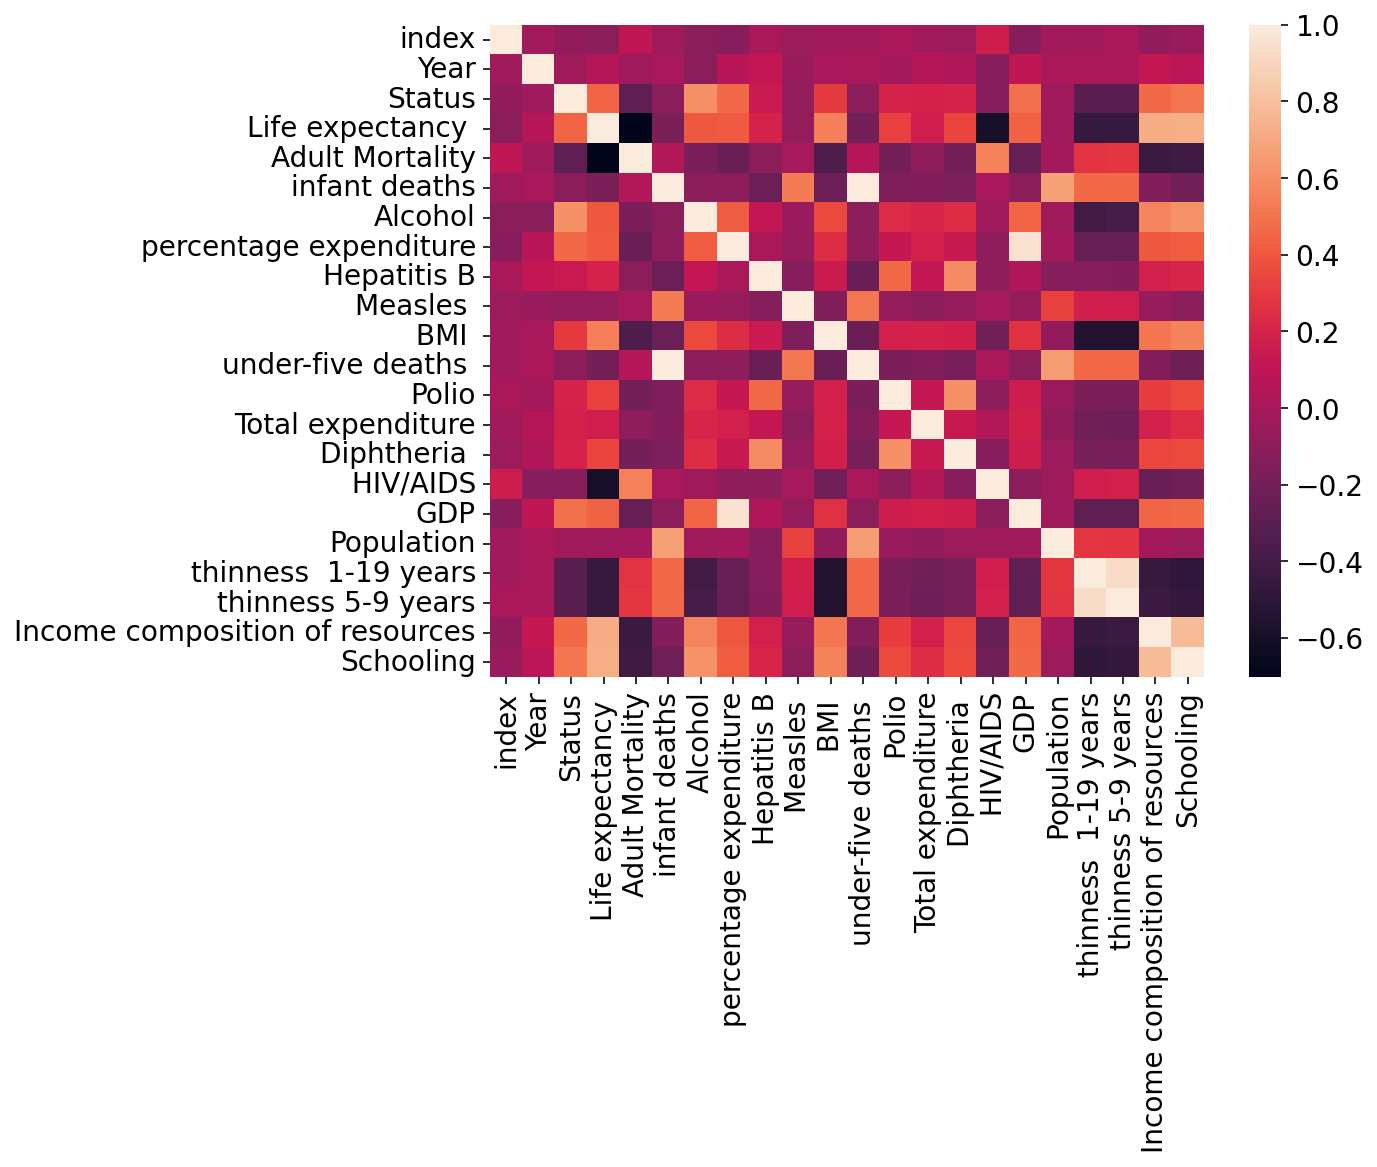

In [36]:
corr = df.corr()
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

### 확률 분포

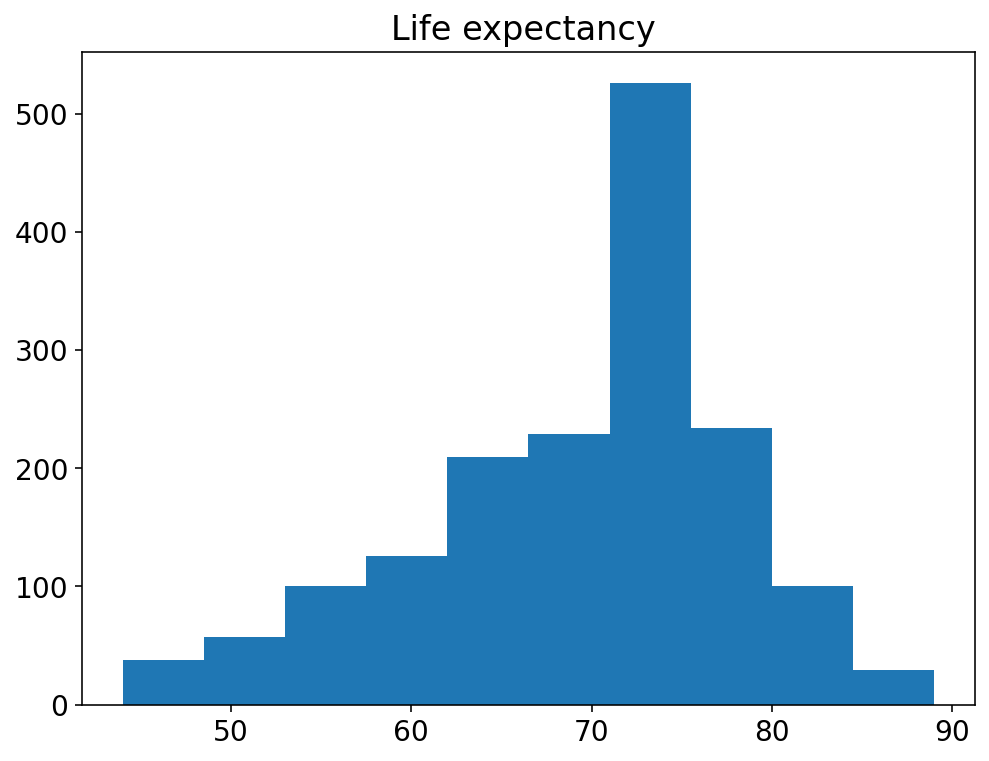

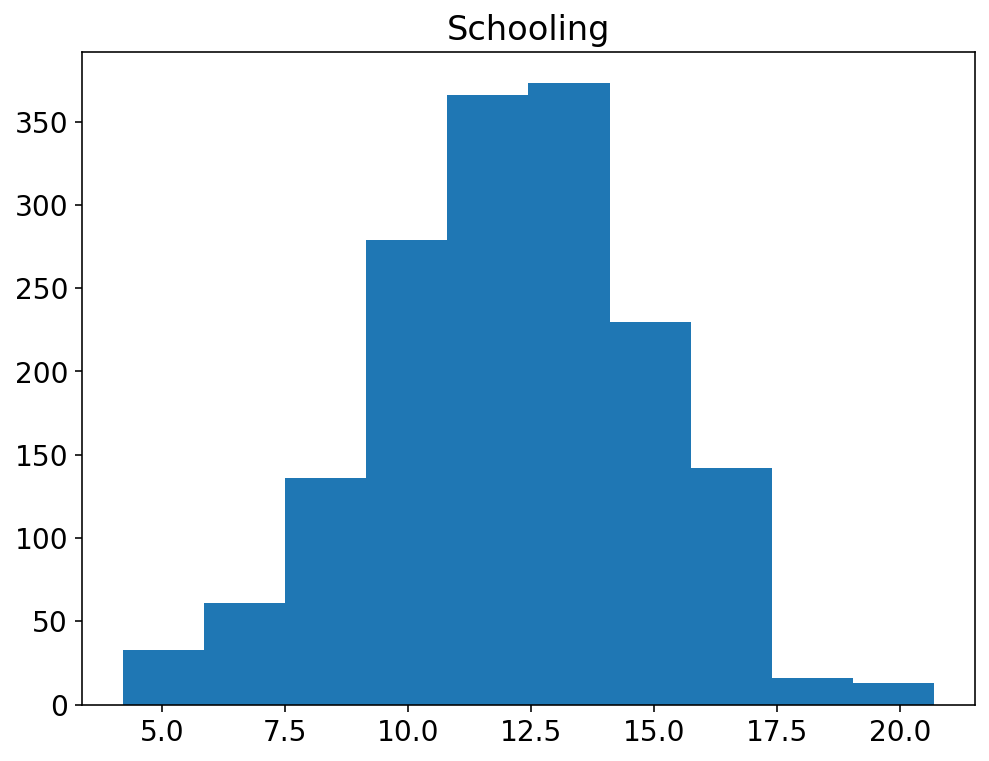

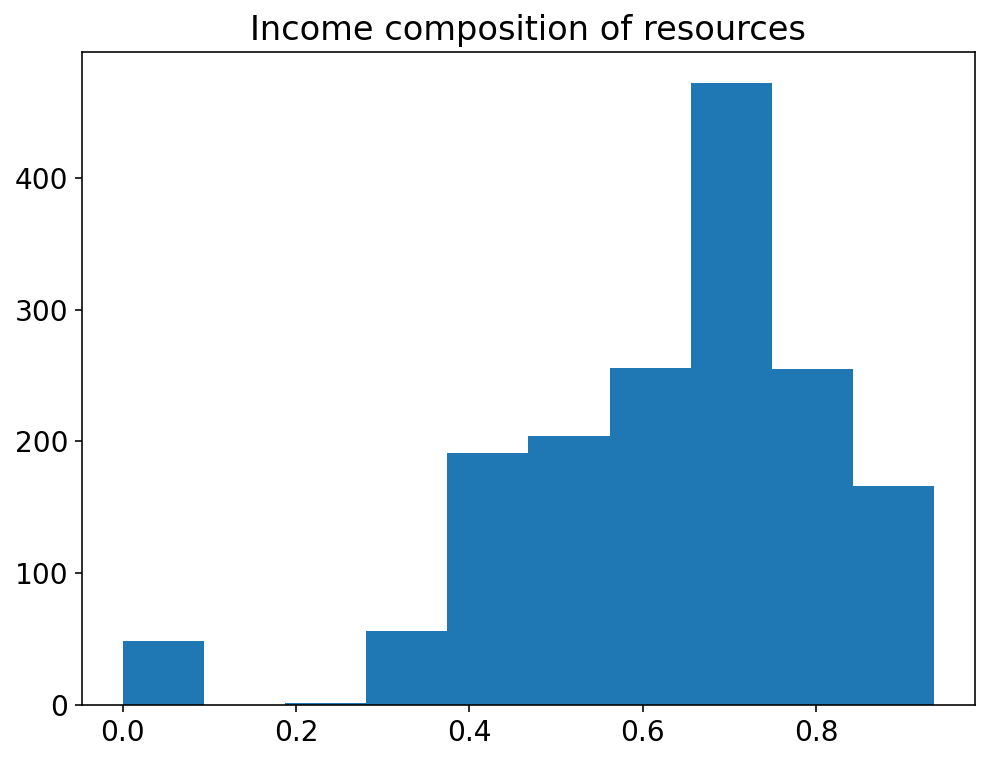

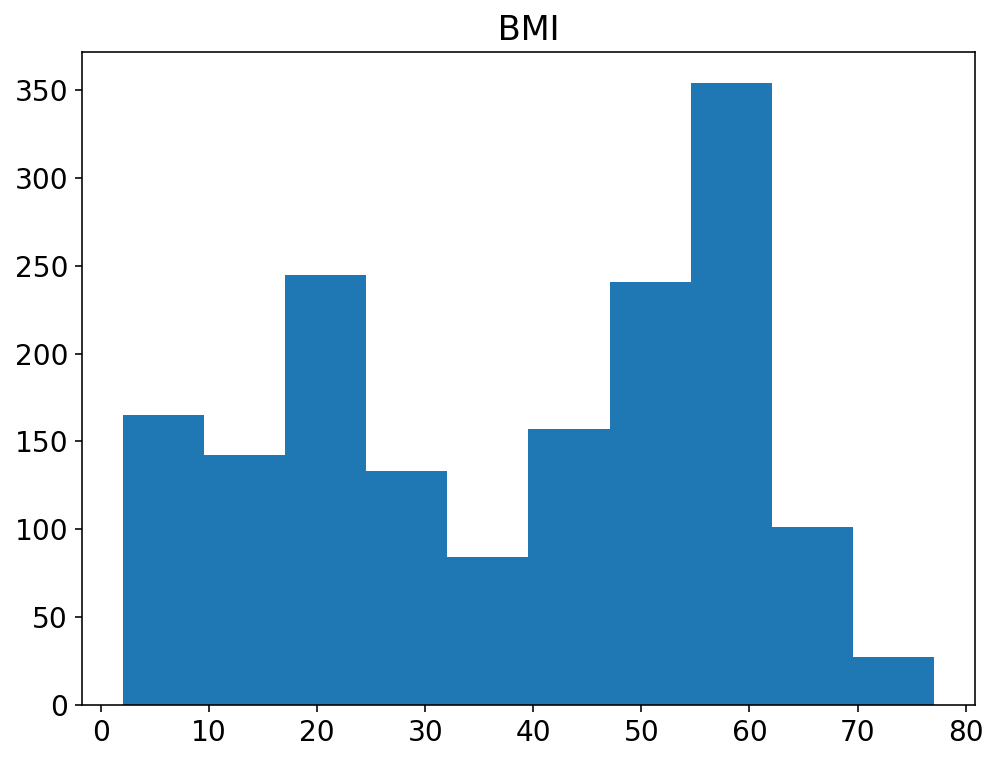

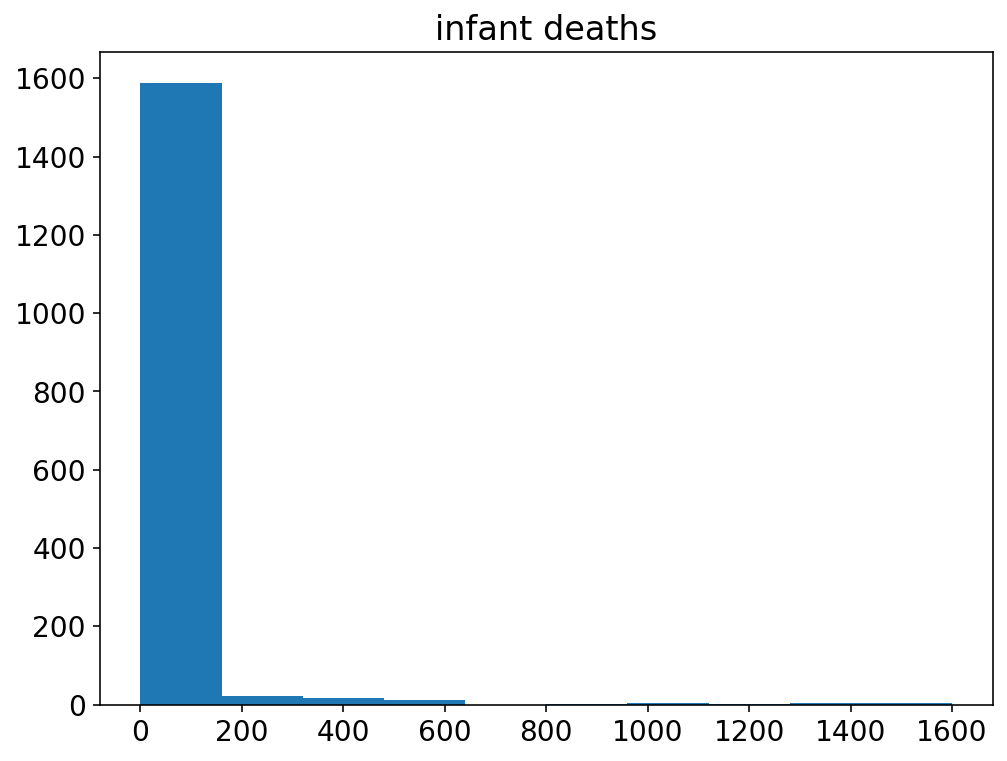

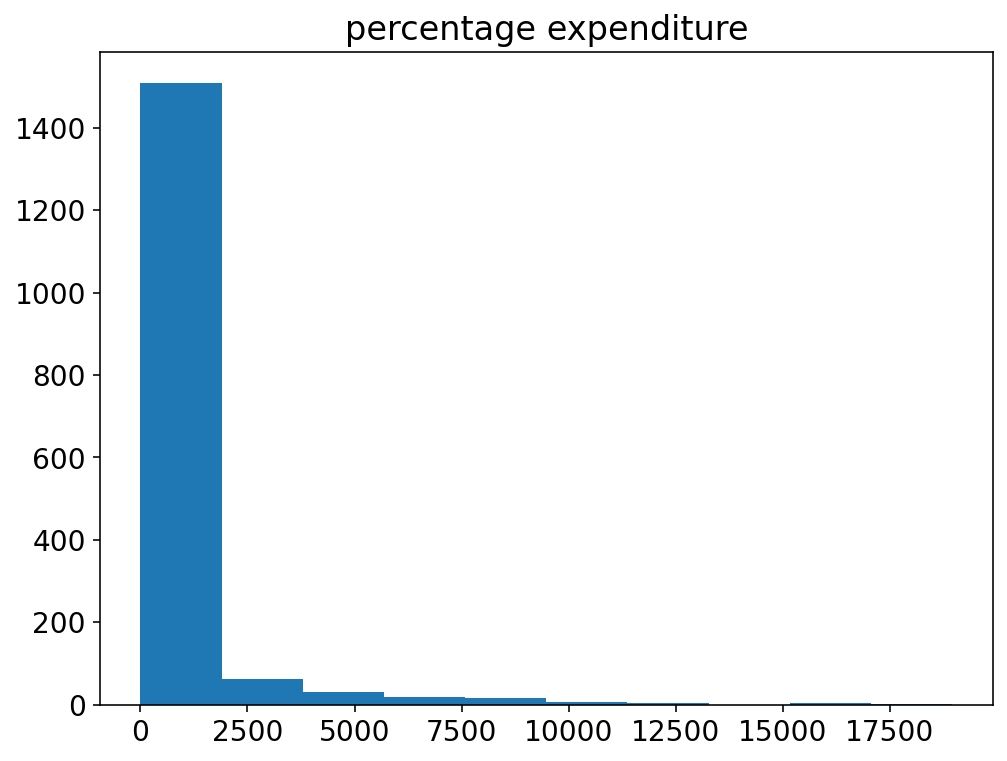

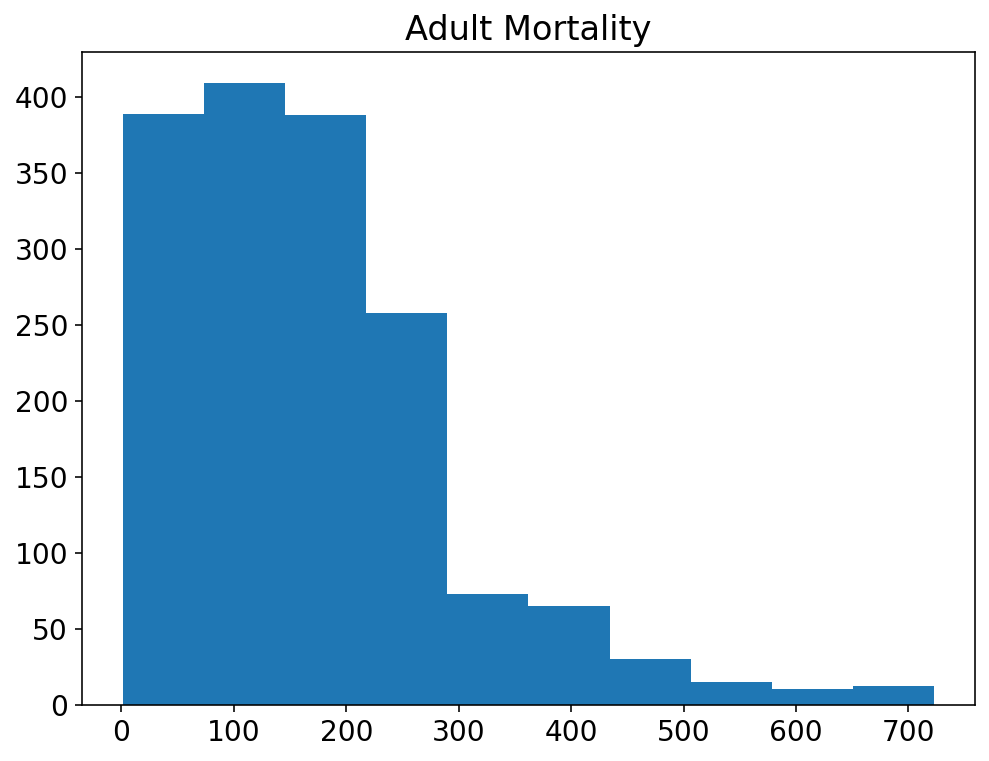

In [37]:
for col in ['Life expectancy ',"Schooling", "Income composition of resources",
 " BMI " , 'infant deaths', 'percentage expenditure', 'Adult Mortality']:
    plt.hist(df[col])
    plt.title(col)
    plt.show()

### 산포도

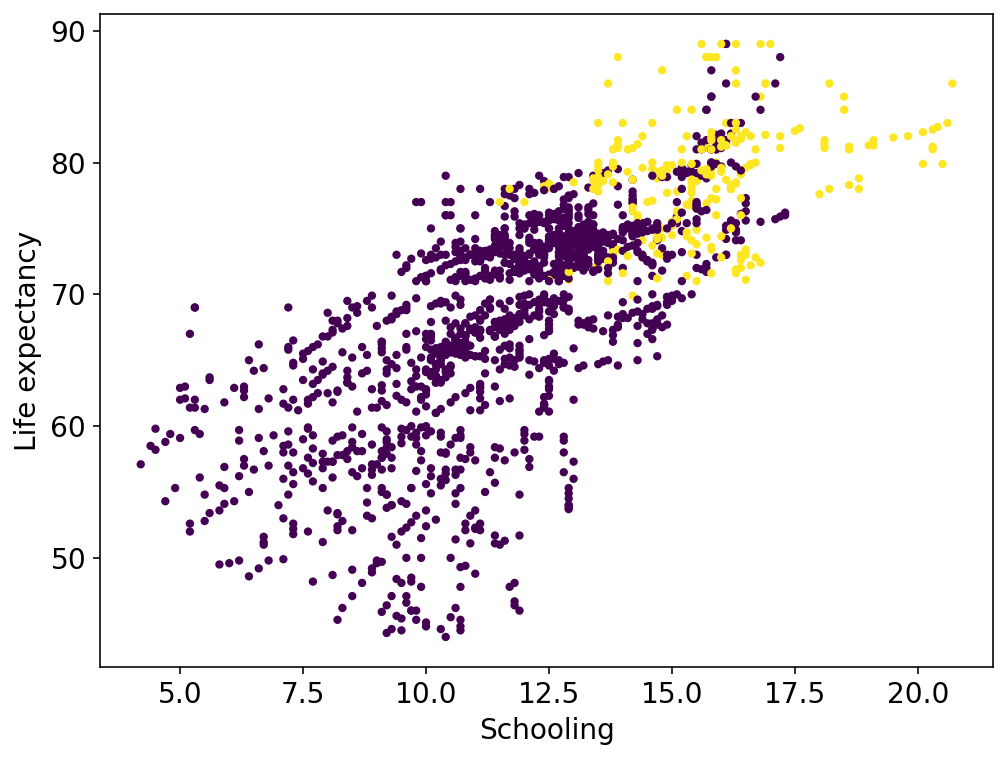

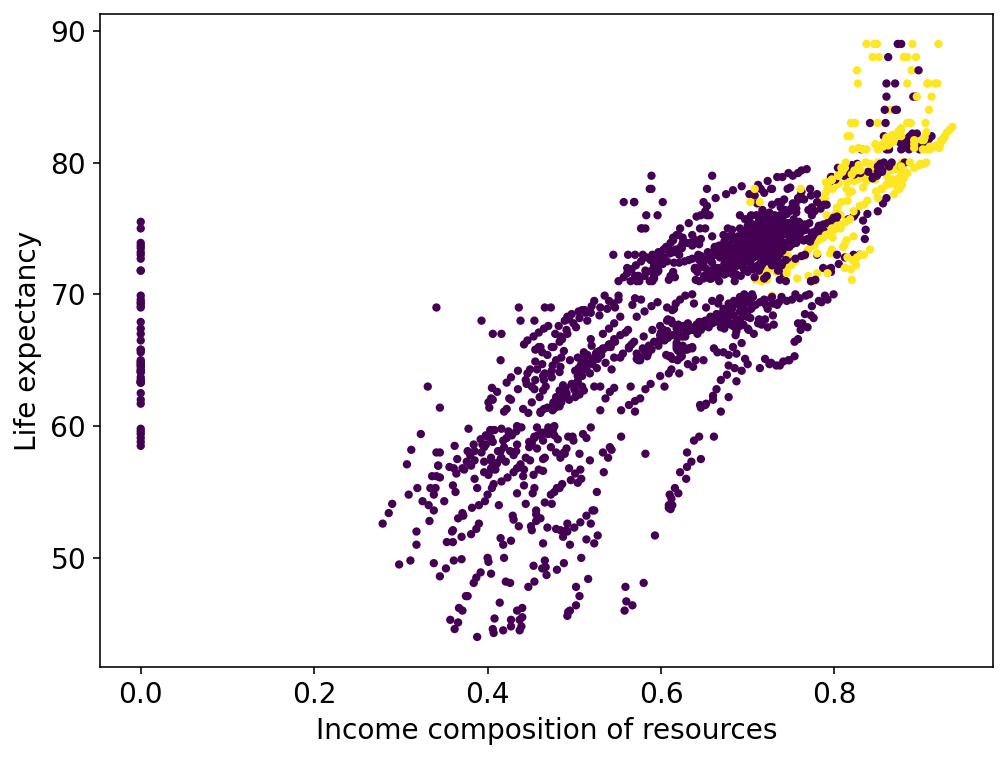

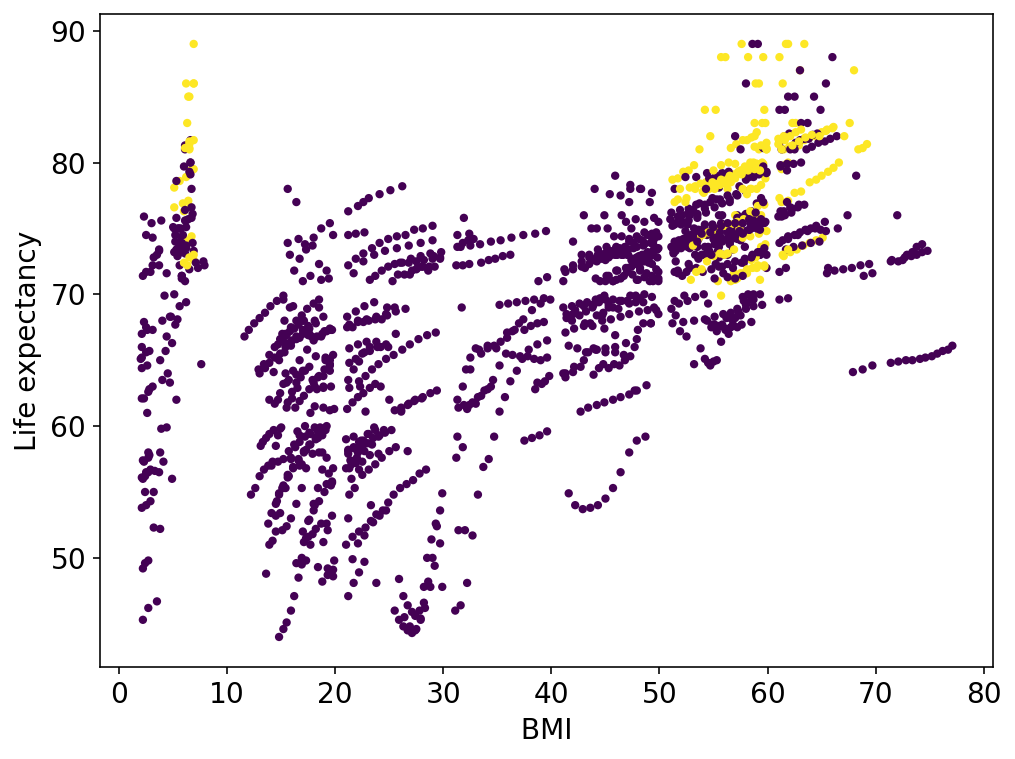

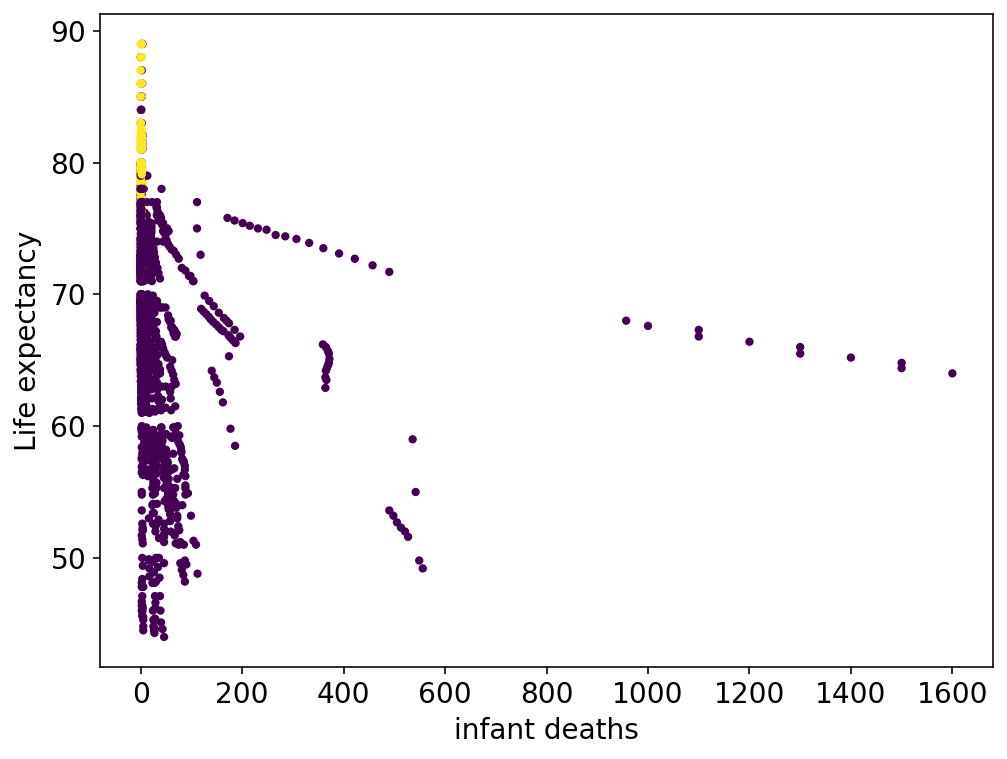

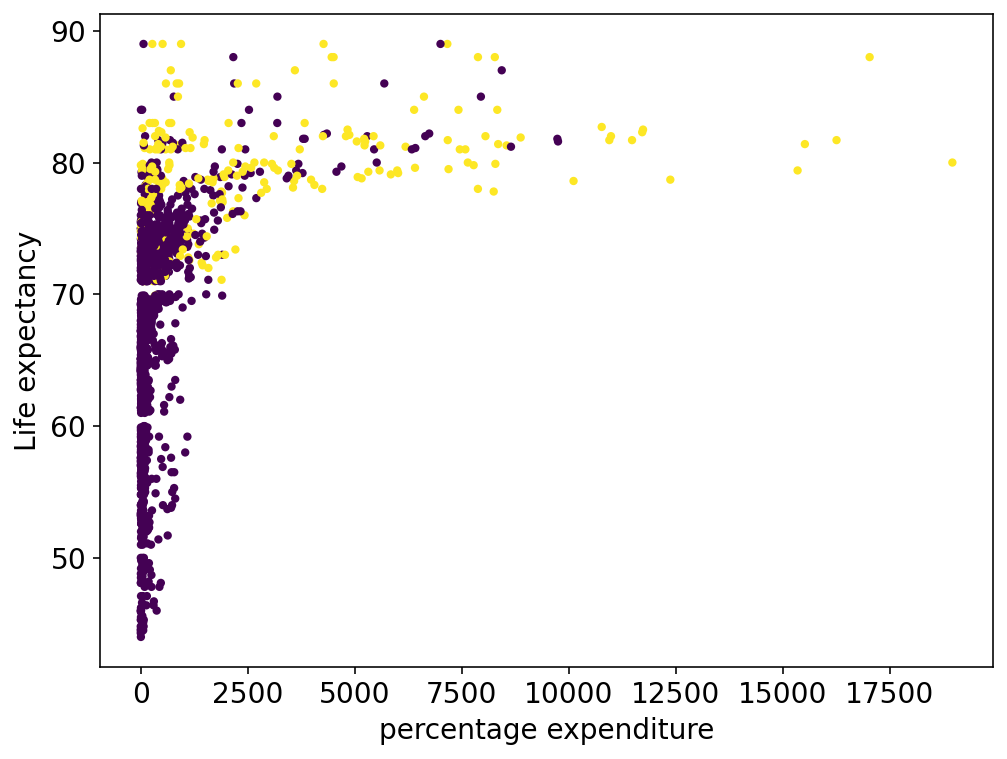

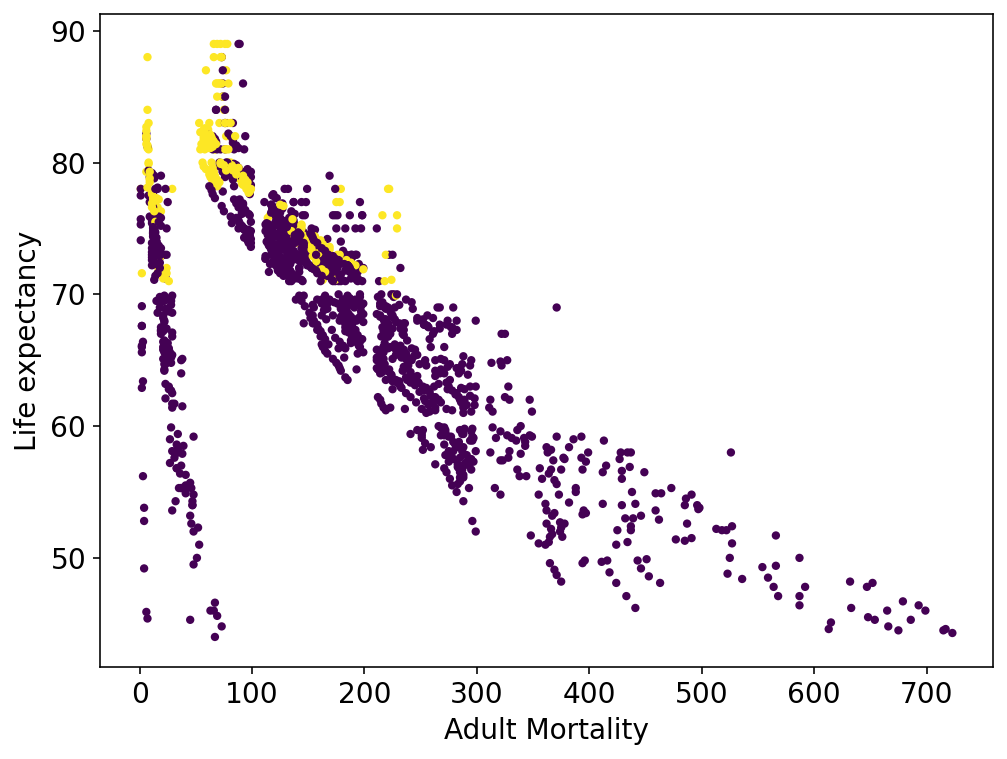

In [38]:
for col in ["Schooling", "Income composition of resources",
 " BMI " , 'infant deaths', 'percentage expenditure', 'Adult Mortality']:
    plt.scatter(df[col] , df['Life expectancy '], c=df.Status, s=10)
    plt.ylabel('Life expectancy')
    plt.xlabel(col)
    plt.show()

# 모델: 선형회귀 모델 

## 모델 생성, 학습, 사용 절차
- (1) 머신러닝에서 사용할 모델을 선택하고 생성한다
- (2) 훈련 데이터를 사용하여 모델을 학습시킨다 (최적의 파라미터를 구한다)
- (3) 검증 데이터를 사용하여 모델의 동작을 검증하고 성능을 평가한다
- (4) 모델 훈련이나 검증에 한번도 사용하지 않은 별도의(hold out) 테스트 데이터를 사용하여 모델 성능을 최종 평가한다

<img src ="https://raw.githubusercontent.com/data-labs/image/main/%E1%84%89%E1%85%B3%E1%84%8F%E1%85%B3%E1%84%85%E1%85%B5%E1%86%AB%E1%84%89%E1%85%A3%E1%86%BA%202021-01-09%20%E1%84%8B%E1%85%A9%E1%84%92%E1%85%AE%204.02.11.png?raw=1" width=450 align='left'>

## 훈련 및 검증 데이터 나누기

- 주어진 샘플 데이터(X, y)를 훈련용과 검증용으로 랜덤하게 나누기 위해서 train_test_split 함수를 주로 사용한다
 - 샘플의 순서를 랜덤하게 섞어서 X_train, X_test 등으로 나눈다

<img src="https://raw.githubusercontent.com/data-labs/image/main/%E1%84%89%E1%85%B3%E1%84%8F%E1%85%B3%E1%84%85%E1%85%B5%E1%86%AB%E1%84%89%E1%85%A3%E1%86%BA%202020-12-29%20%E1%84%8B%E1%85%A9%E1%84%92%E1%85%AE%2011.45.47.png?raw=1" width=300 align='left'>

## 단변수 사용

In [39]:
X = df[['Schooling']]
y = df['Life expectancy ']

X_train, X_test, y_train, y_test = train_test_split(X, y)

model = LinearRegression()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.46835934888877273

In [40]:
a, b = model.coef_, model.intercept_
a, b

(array([2.36564192]), 40.4714207039643)

### 회귀직선

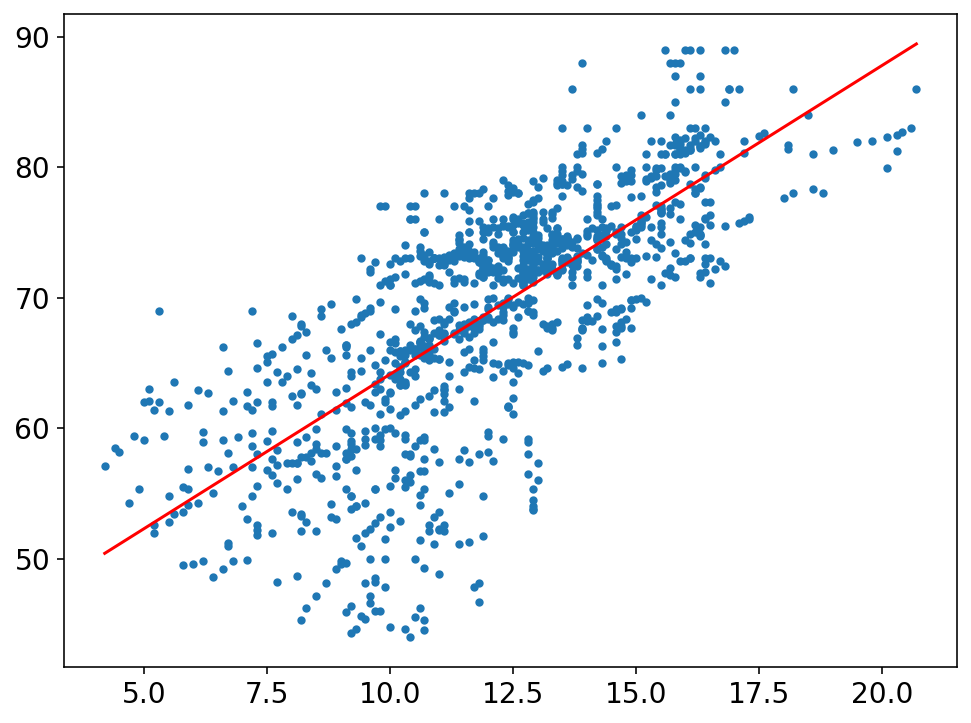

In [41]:
# 산포도
plt.scatter(X_train, y_train, s=10)

# 최소, 최대 지점 찾기
x_min = df.Schooling.min()
x_max = df.Schooling.max()

# 회귀 직선 그리기
xs = np.array((x_min, x_max))
ys = a*xs + b
plt.plot(xs,ys,c="red")
plt.show()

### 회귀 모델 성능 평가
- 회귀 모델의 성능을 평가하는 척도로 기본적으로 R-Squared를 사용하며 MAE, RMSE 등을 참고로 본다
 - MAE: mean absolute error  
 - MSE: mean squared error    
 - RMSE: root MSE  

$MAE = $$1\over{N}$$ \sum |y_{i} - \hat{y}|$

$MSE = $$1\over{N}$$ \sum (y_{i} - \hat{y})^{2}$

$RMSE = \sqrt{MSE}$

$R^{2} = 1$-$\sum(y_{i}-\hat{y})^{2}\over{\sum(y_{i}-\bar{y})^{2}}$ $= 1$-$MSE\over{Variance}$  
 >  $y$ :  실제값, $\hat{y}$ :  예측치, $\bar{y}$ :  평균치
 
-  R-Squared
 - 회귀 성능의 기본적인 평가 지표
 - MSE를 분산으로 정규화한 값을 사용한다
 - R-sqaured 값은 1에 가까울수록 완벽한 예측을 수행한 것이고, 0 근처이면 오차 평균치가 표준편차 정도인 경우이다

In [42]:
def show_reg_result(y_test,y_pred):
    print("Max Error: ", 
      round(np.abs(y_test - y_pred).max(),3))
    print("Mean Absolute Error: ", 
      round(np.abs(y_test-y_pred).mean(),3))
    print("Root Mean Squared Error: ", 
      mean_squared_error(y_test,y_pred, squared=False).round(3))
    print("R-Squared: ", 
      r2_score(y_test, y_pred).round(3))

In [43]:
y_pred = model.predict(X_test)
show_reg_result(y_test,y_pred)

Max Error:  22.623
Mean Absolute Error:  4.657
Root Mean Squared Error:  6.092
R-Squared:  0.468


### 모델 사용

In [44]:
model.predict(np.array([[10],[12],[14]]))

array([64.12783992, 68.85912376, 73.5904076 ])

## (연습) 다른 단변수를 사용한 모델
- 'Adult Mortality'를 사용할 때의 성능을 구하고 회귀 직선을 그리시오

In [45]:
# (풀이)

X = df[['Adult Mortality']]
y = df['Life expectancy ']

X_train, X_test, y_train, y_test = train_test_split(X, y)

model = LinearRegression()
model.fit(X_train, y_train)
model.score(X_test, y_test)



0.5097396708104125

In [46]:
a, b = model.coef_, model.intercept_
a, b

(array([-0.04947913]), 77.51112316394396)

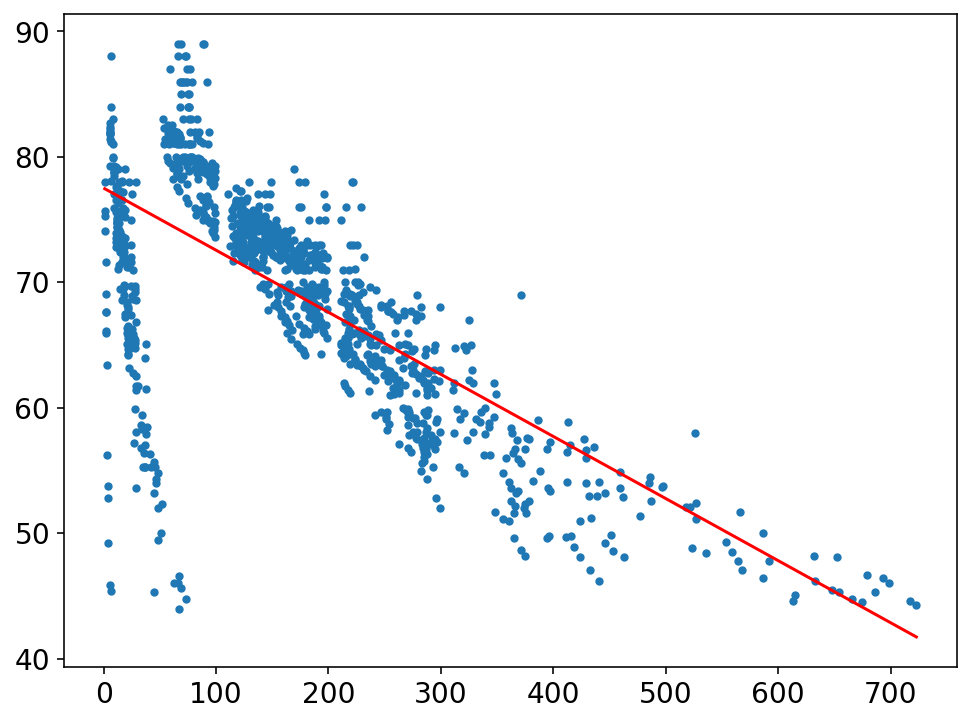

In [47]:
# 산포도
plt.scatter(X_train, y_train, s=10)

# 최소, 최대 지점 찾기
x_min = df['Adult Mortality'].min()
x_max = df['Adult Mortality'].max()

# 회귀 직선 그리기
xs = np.array((x_min, x_max))
ys = a*xs + b
plt.plot(xs,ys,c="red")
plt.show()

## 두개의 변수 사용

In [48]:
X = df[["Schooling",'Status']]
X_train, X_test, y_train, y_test = train_test_split(X, y)
model = LinearRegression()
model.fit(X_train, y_train)
model.score(X_test, y_test)
a1, a2, b = model.coef_[0], model.coef_[1],model.intercept_
a1, a2, b

(2.1066521820677617, 2.2738514215784824, 43.44783432608909)

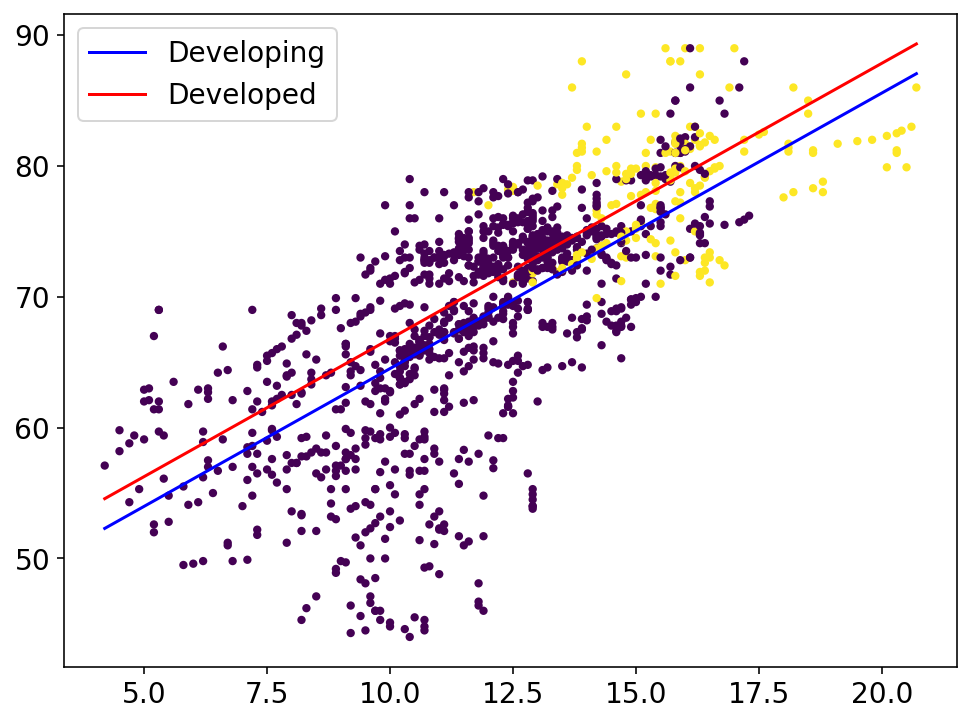

In [49]:
plt.scatter(X_train.Schooling,y_train, c=X_train.Status, s=10)

x_min = df.Schooling.min()
x_max = df.Schooling.max()

xs = np.array((x_min, x_max))
ys = a1*xs + a2*0 + b
plt.plot(xs,ys,c="b", label="Developing")
ys = a1*xs + a2*1 + b
plt.plot(xs,ys,c="r", label="Developed")
plt.legend()
plt.show()

In [50]:
y_pred = model.predict(X_test)
show_reg_result(y_test,y_pred)

Max Error:  20.296
Mean Absolute Error:  4.57
Root Mean Squared Error:  5.867
R-Squared:  0.543


## 모든 변수 사용 

- 다중 회귀 모델
 - 입력 변수가 2개인 다중회귀 모델이므로 파라미터가 변수의 수만큼 자동으로 2개 만들어진다
 - $\hat{y} = b +a_{1}x_{1} + a_{2}x_{2}$
 - $x_{1}$: 성별, $x_{2}$: 키

In [51]:
features = data.columns.difference(['Country','Life expectancy '])
features

Index([' BMI ', ' HIV/AIDS', ' thinness  1-19 years', ' thinness 5-9 years',
       'Adult Mortality', 'Alcohol', 'Diphtheria ', 'GDP', 'Hepatitis B',
       'Income composition of resources', 'Measles ', 'Polio', 'Population',
       'Schooling', 'Status', 'Total expenditure', 'Year', 'infant deaths',
       'percentage expenditure', 'under-five deaths '],
      dtype='object')

In [52]:
X = data[features]
X_train, X_test, y_train, y_test = train_test_split(X, y)
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
show_reg_result(y_test,y_pred)

Max Error:  12.174
Mean Absolute Error:  2.766
Root Mean Squared Error:  3.638
R-Squared:  0.834


## 스케일링

In [53]:
X.dtypes

 BMI                               float64
 HIV/AIDS                          float64
 thinness  1-19 years              float64
 thinness 5-9 years                float64
Adult Mortality                    float64
Alcohol                            float64
Diphtheria                         float64
GDP                                float64
Hepatitis B                        float64
Income composition of resources    float64
Measles                              int64
Polio                              float64
Population                         float64
Schooling                          float64
Status                               int64
Total expenditure                  float64
Year                                 int64
infant deaths                        int64
percentage expenditure             float64
under-five deaths                    int64
dtype: object

In [54]:
cont_features = X.columns.difference(['Status'])
cont_features

Index([' BMI ', ' HIV/AIDS', ' thinness  1-19 years', ' thinness 5-9 years',
       'Adult Mortality', 'Alcohol', 'Diphtheria ', 'GDP', 'Hepatitis B',
       'Income composition of resources', 'Measles ', 'Polio', 'Population',
       'Schooling', 'Total expenditure', 'Year', 'infant deaths',
       'percentage expenditure', 'under-five deaths '],
      dtype='object')

In [55]:
X.loc[:,cont_features] = StandardScaler().fit_transform(X[cont_features])
X[:3]

,BMI,HIV/AIDS,thinness 1-19 years,thinness 5-9 years,Adult Mortality,Alcohol,Diphtheria,GDP,Hepatitis B,Income composition of resources,Measles,Polio,Population,Schooling,Status,Total expenditure,Year,infant deaths,percentage expenditure,under-five deaths
0,-0.963560,-0.312389,2.685909,2.663654,0.756629,-1.122948,-0.887941,-0.434239,-0.555446,-0.833462,-0.106171,-3.455955,0.270913,-0.722799,0,0.958840,1.751998,0.243745,-0.356909,0.238134
1,-0.988878,-0.312389,2.751157,2.706643,0.820490,-1.122948,-1.027006,-0.431760,-0.672648,-0.849853,-0.171828,-1.139051,-0.203382,-0.758583,0,0.967541,1.507289,0.260300,-0.355633,0.256557
2,-1.014197,-0.312389,2.794656,2.749632,0.796542,-1.122948,-0.934296,-0.430100,-0.594514,-0.882634,-0.177977,-0.960828,0.242452,-0.794367,0,0.945790,1.262579,0.276854,-0.355806,0.274979


- 최종 데이터 백업

In [56]:
X_final = X.copy()

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X_final, y)
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
show_reg_result(y_test,y_pred)

Max Error:  13.24
Mean Absolute Error:  2.752
Root Mean Squared Error:  3.631
R-Squared:  0.838


# 결과: 회귀결과 그래프

## 샘플 예측 비교

In [58]:
def plot_reg_result(y_test, y_pred, N=50):
    y_t=y_test.ravel()
    y_p=y_pred.ravel()
    plt.plot(y_t[:N], 'r.-', label='y_test')
    plt.plot(y_p[:N], 'b.--', label='y_pred')
    plt.legend()
    plt.show()
    plt.title("Residue Plot")
    plt.scatter(y_t, y_t-y_p, s=5)

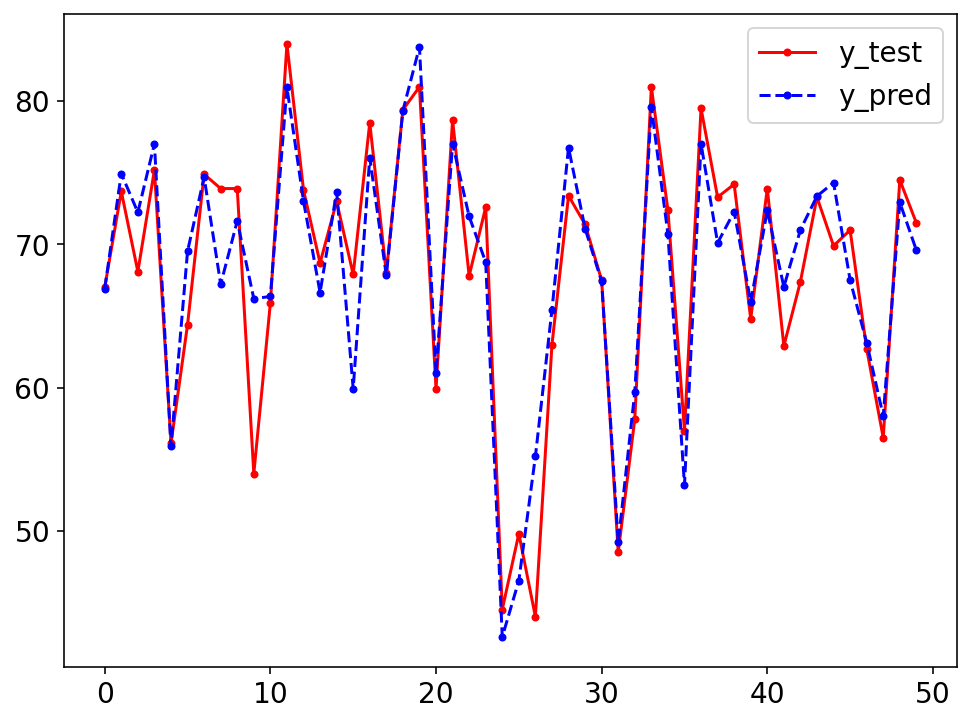

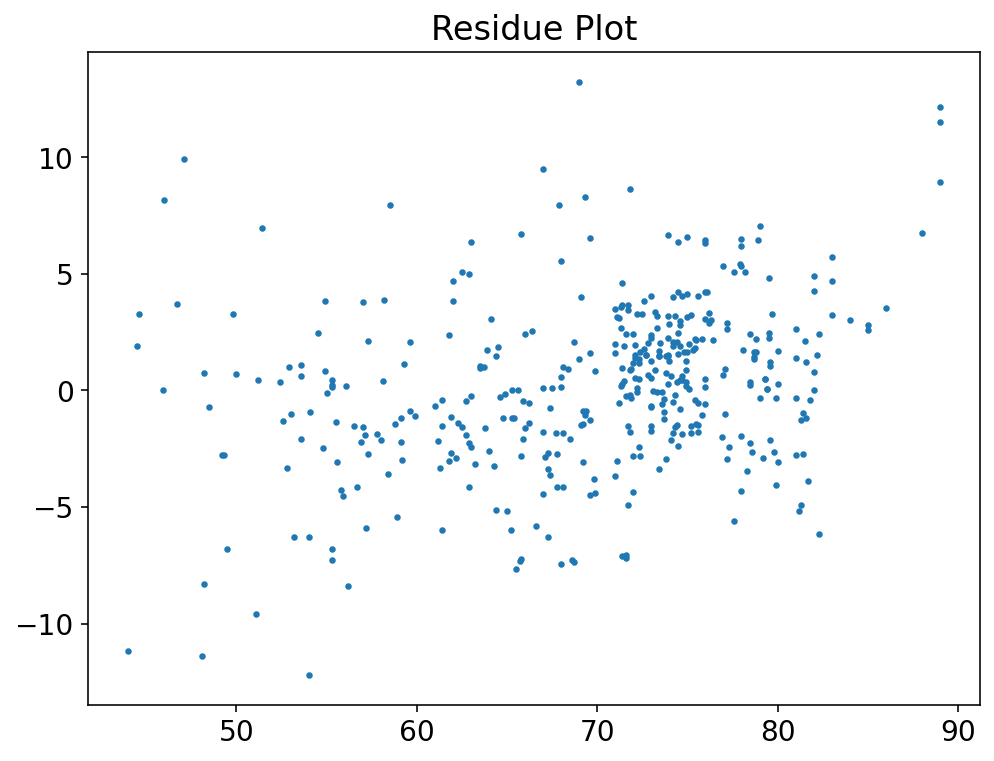

In [59]:
y_pred = model.predict(X_test)
plot_reg_result(y_test, y_pred)

In [60]:
X_test[:5]

,BMI,HIV/AIDS,thinness 1-19 years,thinness 5-9 years,Adult Mortality,Alcohol,Diphtheria,GDP,Hepatitis B,Income composition of resources,Measles,Polio,Population,Schooling,Status,Total expenditure,Year,infant deaths,percentage expenditure,under-five deaths
2033,-1.824395,-0.312389,-0.837489,1.030069,0.437325,-0.077755,0.224579,-0.381030,-1.180522,0.057087,-0.208921,-3.322287,1.016775,-0.186038,0,-0.890040,-0.695101,0.268577,-0.337320,0.244275
388,1.274612,-0.312389,-0.619996,-0.625010,-0.193301,1.523549,0.502709,0.195931,0.655638,0.783731,-0.205053,0.509514,-0.103711,0.744348,1,0.402001,0.773159,-0.261178,0.100174,-0.265401
909,0.813812,-0.312389,-0.141509,-0.216614,0.397412,-0.720760,0.502709,-0.194651,0.772839,0.324798,-0.216954,0.554070,-0.196415,0.458075,0,-1.020549,-0.939811,-0.269455,-0.372423,-0.271541
89,0.980916,-0.312389,-0.815740,-0.861450,-0.329005,0.798617,0.317289,0.027259,0.186831,0.821975,-0.220624,0.375847,-0.151872,1.424245,0,0.314995,-0.450391,-0.178404,0.149090,-0.197853
407,-1.140790,-0.080237,1.011207,0.901102,0.956194,-0.008241,0.409999,-0.435503,0.538436,-1.565570,-0.181448,0.375847,0.000513,-2.404650,0,0.354148,0.039029,0.103029,-0.336144,0.219712


## 선형 계수

In [61]:
def plot_feature_weight(feature, weight):
    plt.figure(figsize=(8,8))
    W = pd.DataFrame({'feature':feature,'weight':weight})
    W.sort_values('weight', inplace=True)
    plt.barh(W.feature, W.weight)

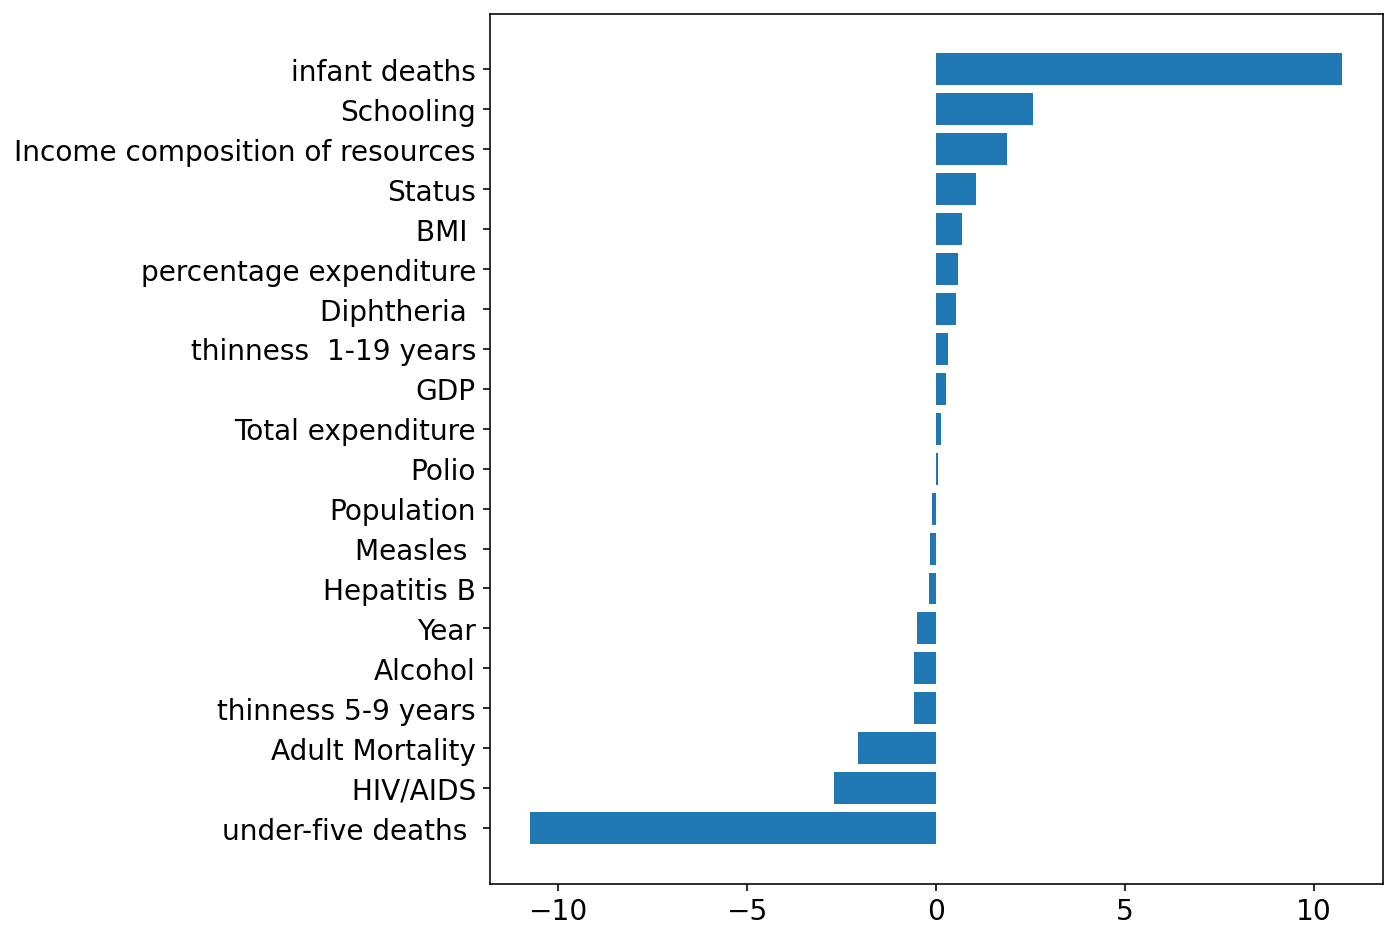

In [62]:
plot_feature_weight(X.columns, model.coef_)

## 상관계수

In [63]:
df_corr = df.corr()
df_corr[:5]

,index,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
index,1.000000,-0.024005,-0.081569,-0.115201,0.100986,-0.028919,-0.108250,-0.120648,0.012779,-0.037481,-0.021279,-0.023491,0.011375,-0.021566,-0.037585,0.156730,-0.117444,-0.018805,-0.021624,0.010603,-0.081672,-0.053490
Year,-0.024005,1.000000,-0.034138,0.050771,-0.037092,0.008029,-0.113365,0.069553,0.114897,-0.053822,0.005739,0.010479,-0.016699,0.059493,0.029641,-0.123405,0.096421,0.012567,0.019757,0.014122,0.122892,0.088732
Status,-0.081569,-0.034138,1.000000,0.442798,-0.278173,-0.108757,0.607782,0.461688,0.140351,-0.071963,0.298380,-0.109847,0.201917,0.192538,0.201654,-0.129555,0.484801,-0.034790,-0.308005,-0.307279,0.463615,0.512543
Life expectancy,-0.115201,0.050771,0.442798,1.000000,-0.702523,-0.169074,0.402718,0.409631,0.199935,-0.068881,0.542042,-0.192265,0.327294,0.174718,0.341331,-0.592236,0.441322,-0.022305,-0.457838,-0.457508,0.721083,0.727630
Adult Mortality,0.100986,-0.037092,-0.278173,-0.702523,1.000000,0.042450,-0.175535,-0.237610,-0.105225,-0.003967,-0.351542,0.060365,-0.199853,-0.085227,-0.191429,0.550691,-0.255035,-0.015012,0.272230,0.286723,-0.442203,-0.421171


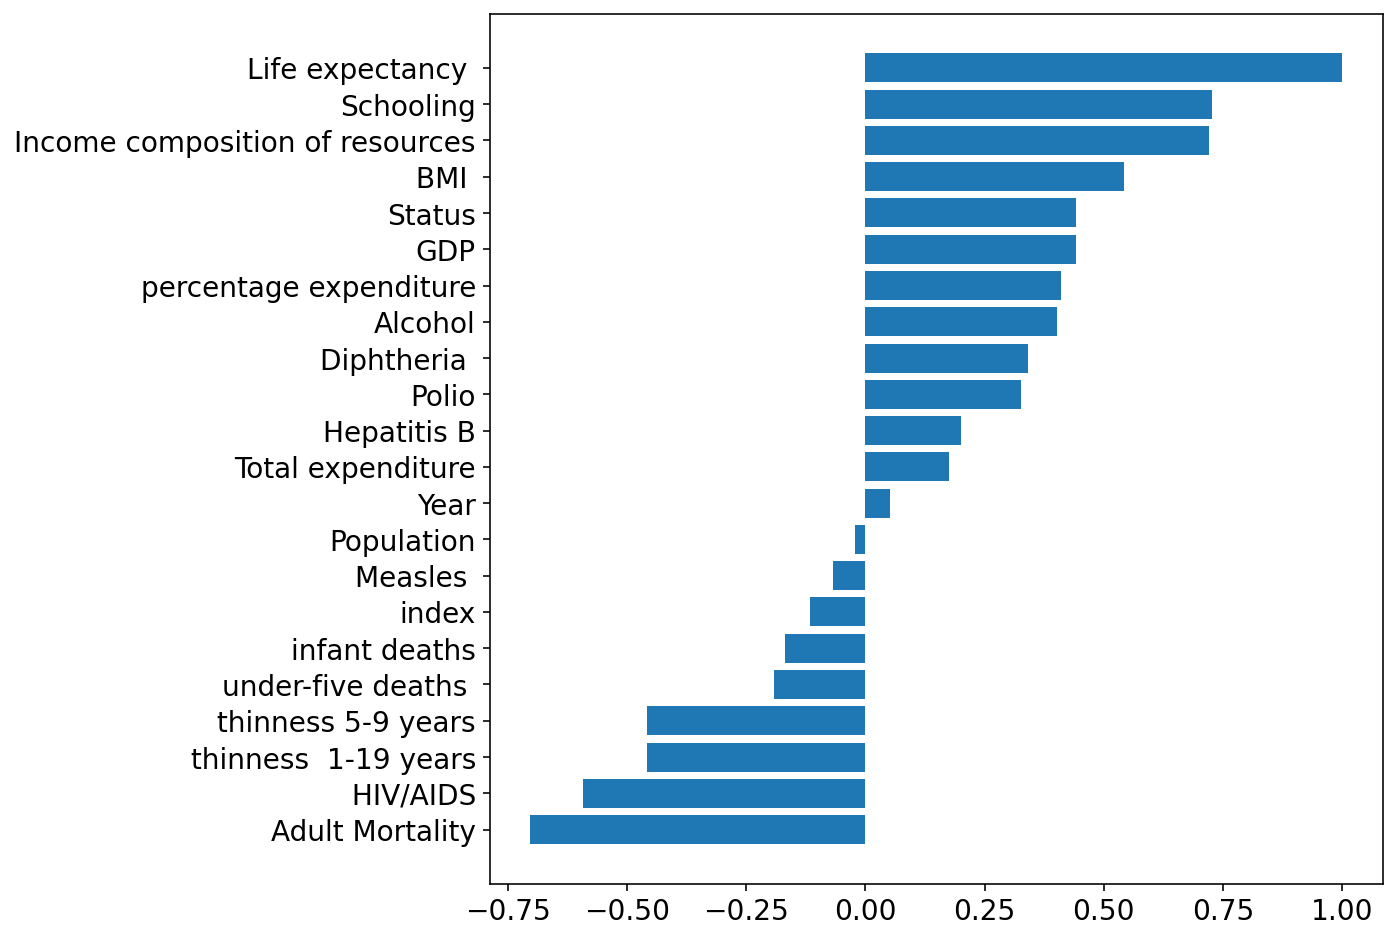

In [64]:
plot_feature_weight(df_corr.index, df_corr['Life expectancy '])

## 랜덤포레스트 모델
- 성능이 가장 우수한 랜덤 포레스트 모델과 비교
- 랜덤 포레스트 모델에 대해서는 나중에 설명함

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X_final, y)
rfr = RandomForestRegressor()
rfr.fit(X_train, y_train)
rfr.score(X_test, y_test)

0.9693492054162968

In [66]:
y_pred = rfr.predict(X_test)
show_reg_result(y_test,y_pred)

Max Error:  8.591
Mean Absolute Error:  1.103
Root Mean Squared Error:  1.645
R-Squared:  0.969


- 랜덤 포레스트 모델은 "가중치"가 아니라 특성 중요도를 제공한다 (어떤 특성이 예측에 가장 중요하게 사용되었는지 알려준다)

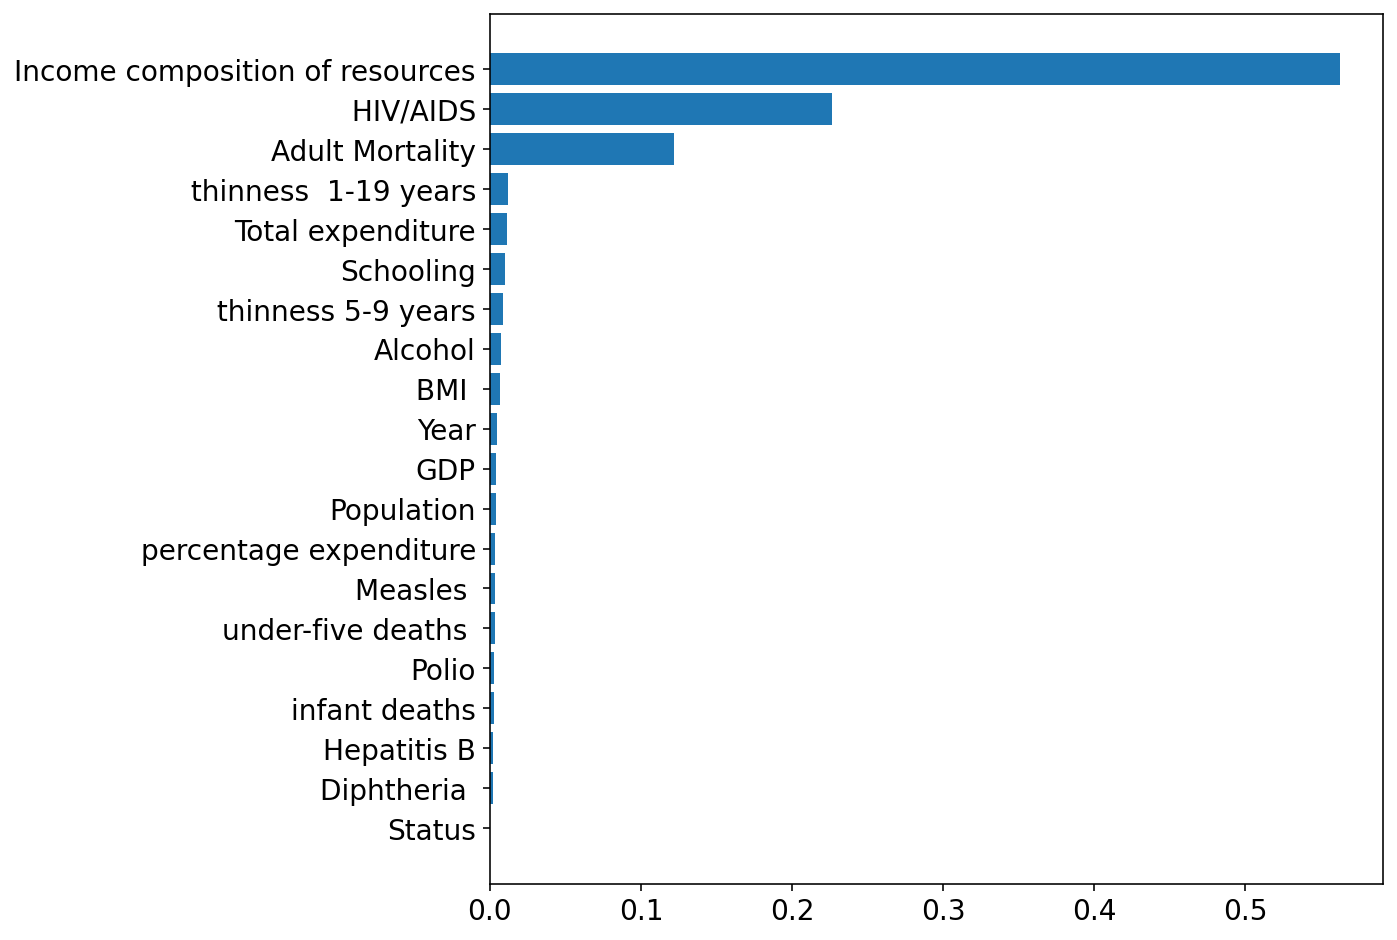

In [67]:
plot_feature_weight(X.columns, rfr.feature_importances_)

## (연습) 가장 성능이 좋은 3개의 특성 선택하기
- 임의로 3개의 특성을 선택했을 때 성능이 가능 좋은 경우가 언제인지 찾아보시오
- 선형모델 가중치가 큰 특성 고르기, 상관계수가 큰 특성 고르기, 특성중요도가 큰 특성 고르기를 각각 3개씩 선택하고 성능을 비교하시오
- 선형모델과 랜덤 포레스트 모델의 성능을 각각 구하시오 (총 6가지 경우의 성능 비교)

In [68]:
import itertools

result = list(itertools.combinations(features,3))
print("**경우의 수 : %s개" % len(result))
print(result)

**경우의 수 : 1140개
[(' BMI ', ' HIV/AIDS', ' thinness  1-19 years'), (' BMI ', ' HIV/AIDS', ' thinness 5-9 years'), (' BMI ', ' HIV/AIDS', 'Adult Mortality'), (' BMI ', ' HIV/AIDS', 'Alcohol'), (' BMI ', ' HIV/AIDS', 'Diphtheria '), (' BMI ', ' HIV/AIDS', 'GDP'), (' BMI ', ' HIV/AIDS', 'Hepatitis B'), (' BMI ', ' HIV/AIDS', 'Income composition of resources'), (' BMI ', ' HIV/AIDS', 'Measles '), (' BMI ', ' HIV/AIDS', 'Polio'), (' BMI ', ' HIV/AIDS', 'Population'), (' BMI ', ' HIV/AIDS', 'Schooling'), (' BMI ', ' HIV/AIDS', 'Status'), (' BMI ', ' HIV/AIDS', 'Total expenditure'), (' BMI ', ' HIV/AIDS', 'Year'), (' BMI ', ' HIV/AIDS', 'infant deaths'), (' BMI ', ' HIV/AIDS', 'percentage expenditure'), (' BMI ', ' HIV/AIDS', 'under-five deaths '), (' BMI ', ' thinness  1-19 years', ' thinness 5-9 years'), (' BMI ', ' thinness  1-19 years', 'Adult Mortality'), (' BMI ', ' thinness  1-19 years', 'Alcohol'), (' BMI ', ' thinness  1-19 years', 'Diphtheria '), (' BMI ', ' thinness  1-19 years', 'G

In [88]:
df.columns

Index(['index', 'Country', 'Year', 'Status', 'Life expectancy ',
       'Adult Mortality', 'infant deaths', 'Alcohol', 'percentage expenditure',
       'Hepatitis B', 'Measles ', ' BMI ', 'under-five deaths ', 'Polio',
       'Total expenditure', 'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [94]:
df[['Country','Year']]

,Country,Year
0,Afghanistan,2015
1,Afghanistan,2014
2,Afghanistan,2013
3,Afghanistan,2012
4,Afghanistan,2011
...,...,...
1644,Zimbabwe,2004
1645,Zimbabwe,2003
1646,Zimbabwe,2002
1647,Zimbabwe,2001


In [71]:
# (풀이)
lin=[]
rft=[]
for comb in result:
  X = df[comb]
  X_train, X_test, y_train, y_test = train_test_split(X, y)
  model = LinearRegression()
  model.fit(X_train, y_train)
  lin.append(model.score(X_test, y_test))

  rfr = RandomForestRegressor()
  rfr.fit(X_train, y_train)
  rft.append(rfr.score(X_test, y_test))

KeyError: ignored

# 정답

## (연습) 다른 단변수를 사용한 모델
- 'Adult Mortality'를 사용할 때의 성능을 구하고 회귀 직선을 그리시오

In [ ]:
X = df[['Adult Mortality']]
y = df['Life expectancy ']

X_train, X_test, y_train, y_test = train_test_split(X, y)

model = LinearRegression()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.5017621118441388

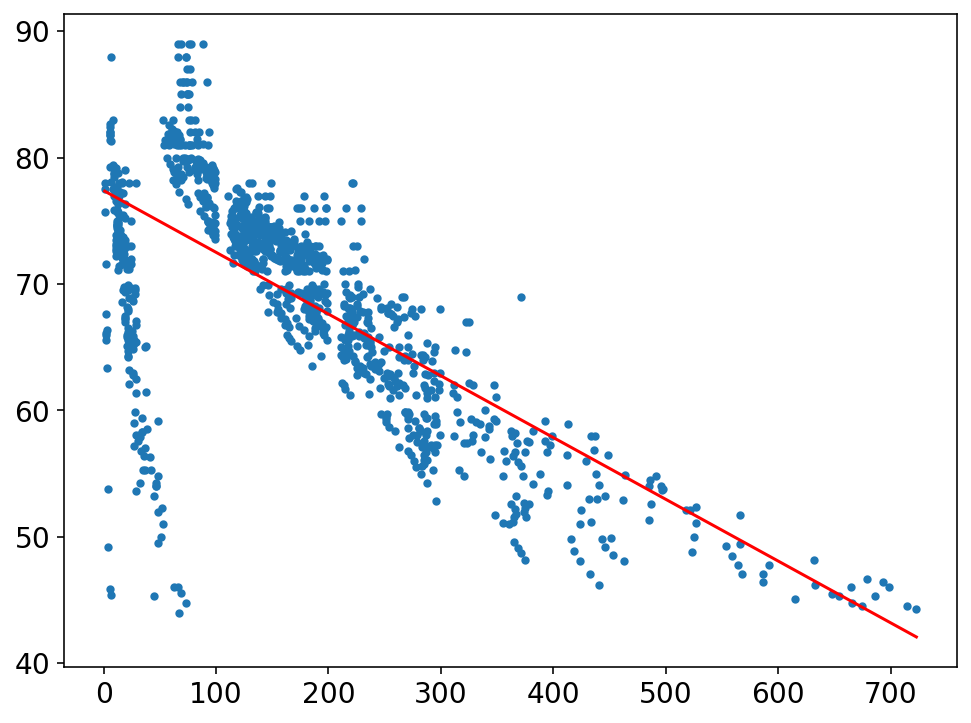

In [ ]:
a, b = model.coef_, model.intercept_
plt.scatter(X_train, y_train, s=10)

x_min = df['Adult Mortality'].min()
x_max = df['Adult Mortality'].max()

xs = np.array((x_min, x_max))
ys = a*xs + b
plt.plot(xs,ys,c="red")
plt.show()

## (연습) 가장 성능이 좋은 3개의 특성 선택하기
- 임의로 3개의 특성을 선택했을 때 성능이 가능 좋은 경우가 언제인지 찾아보시오
- 선형모델 가중치가 큰 특성 고르기, 상관계수가 큰 특성 고르기, 특성중요도가 큰 특성 고르기를 각각 3개씩 선택하고 성능을 비교하시오
- 선형모델과 랜덤 포레스트 모델의 성능을 각각 구하시오 (총 6가지 경우의 성능 비교)

In [ ]:
X_final.columns

Index([' BMI ', ' HIV/AIDS', ' thinness  1-19 years', ' thinness 5-9 years',
       'Adult Mortality', 'Alcohol', 'Diphtheria ', 'GDP', 'Hepatitis B',
       'Income composition of resources', 'Measles ', 'Polio', 'Population',
       'Schooling', 'Status', 'Total expenditure', 'Year', 'infant deaths',
       'percentage expenditure', 'under-five deaths '],
      dtype='object')

In [ ]:
feature_linear = ['infant deaths','under-five deaths ','Schooling']
feature_corr = ['Schooling','Income composition of resources', 'Adult Mortality']
feature_rfr = ['Income composition of resources',' HIV/AIDS', 'Adult Mortality']

for feature in [feature_linear, feature_corr, feature_rfr]:
    X_ft = X_final[feature]
    print(feature)
    X_train, X_test, y_train, y_test = train_test_split(X_ft, y)
    model.fit(X_train, y_train)
    print("Linear Model:", model.score(X_test, y_test).round(3))
    rfr.fit(X_train, y_train)
    print("Random Forest Model:", rfr.score(X_test, y_test).round(3))
    print()

['infant deaths', 'under-five deaths ', 'Schooling']
Linear Model: 0.55
Random Forest Model: 0.733

['Schooling', 'Income composition of resources', 'Adult Mortality']
Linear Model: 0.742
Random Forest Model: 0.928

['Income composition of resources', ' HIV/AIDS', 'Adult Mortality']
Linear Model: 0.738
Random Forest Model: 0.944

